In [175]:
# Importing modules
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

In [235]:
hotel_reviews = pd.read_csv('/Users/mayank/Downloads/hotel/Hotel_Reviews.csv')
hotel_reviews

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [177]:
hotel_reviews.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                            True
lng                                            True
dtype: bool

### There are missing values in the latitude and longitude variables of the data but we are not going to use those two columns anyway so we can drop them.

In [196]:
# Checking the number of reviews per hotel 
reviews_per_hotel = hotel_reviews['Hotel_Name'].value_counts()
print("The 10 most reviewed hotels:\n",reviews_per_hotel.head(10))

The 10 most reviewed hotels:
 Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Name: Hotel_Name, dtype: int64


In [198]:
# Most frequently reviewed hotels for the top 10 nationalities of reviewers

nationality = hotel_reviews["Reviewer_Nationality"].value_counts()

for x in nationality[:10].index:
   # Extracting the rows that fit the criteria
   nat_df = hotel_reviews[hotel_reviews["Reviewer_Nationality"] == x]   
   # Getting the frequency of reviews 
   freq = nat_df["Hotel_Name"].value_counts()
   print("The most reviewed hotel for " + str(x).strip() + " was " + str(freq.index[0]) + " with " + str(freq[0]) + " reviews.")  

The most reviewed hotel for United Kingdom was Britannia International Hotel Canary Wharf with 3833 reviews.
The most reviewed hotel for United States of America was Hotel Esther a with 423 reviews.
The most reviewed hotel for Australia was Park Plaza Westminster Bridge London with 167 reviews.
The most reviewed hotel for Ireland was Copthorne Tara Hotel London Kensington with 239 reviews.
The most reviewed hotel for United Arab Emirates was Millennium Hotel London Knightsbridge with 129 reviews.
The most reviewed hotel for Saudi Arabia was The Cumberland A Guoman Hotel with 142 reviews.
The most reviewed hotel for Netherlands was Jaz Amsterdam with 97 reviews.
The most reviewed hotel for Switzerland was Hotel Da Vinci with 97 reviews.
The most reviewed hotel for Germany was Hotel Da Vinci with 86 reviews.
The most reviewed hotel for Canada was St James Court A Taj Hotel London with 61 reviews.


In [180]:
# Checking the total number of hotels 
print('The total number of hotels are: ', reviews_per_hotel.size)

The total number of hotels are:  1492


In [181]:
hotel_reviews['Hotel_Address'].value_counts()

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
21 rue Lavoisier 8th arr 75008 Paris France                                         12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: Hotel_Address, Length: 1493, dtype: i

In [236]:
def replacing_address(rows):
    if "Netherlands" in rows["Hotel_Address"]:
        return "Netherlands"
    elif "Barcelona" in rows["Hotel_Address"]:
        return "Spain"
    elif "United Kingdom" in rows["Hotel_Address"]:
        return "UK"
    elif "Milan" in rows["Hotel_Address"]:        
        return "Italy"
    elif "France" in rows["Hotel_Address"]:
        return "France"
    elif "Vienna" in rows["Hotel_Address"]:
        return "Austria" 

# Replacing all the addresses to group them by country 
hotel_reviews["Hotel_Address"] = hotel_reviews.apply(replacing_address, axis = 1)

In [237]:
print("The number of hotels in each country:\n")
print(hotel_reviews["Hotel_Address"].value_counts())

The number of hotels in each country:

UK             262301
Spain           60149
France          59928
Netherlands     57214
Austria         38939
Italy           37207
Name: Hotel_Address, dtype: int64


In [228]:
# Setting plot style

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

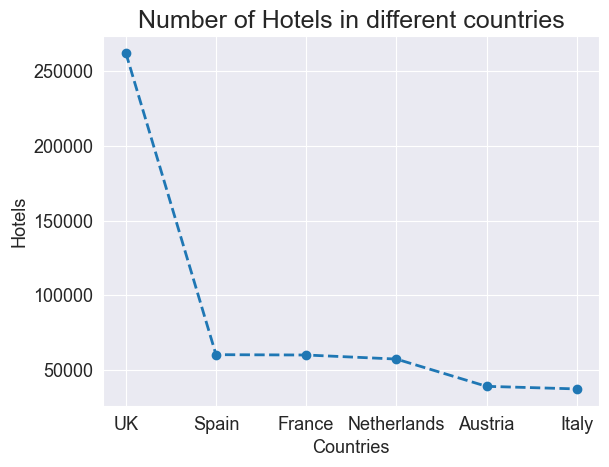

In [227]:
# Create a line plot for 'alive' column
plt.plot(hotel_reviews["Hotel_Address"].value_counts(), 'o--', linewidth=2)

# Set plot labels
plt.xlabel('Countries')
plt.ylabel('Hotels')
plt.title('Number of Hotels in different countries')

# Show the plot
plt.show()

### This shows the number of hotels from a certain country in our dataset

### Making a wordcloud to see what common words are used in positive and negative reviews

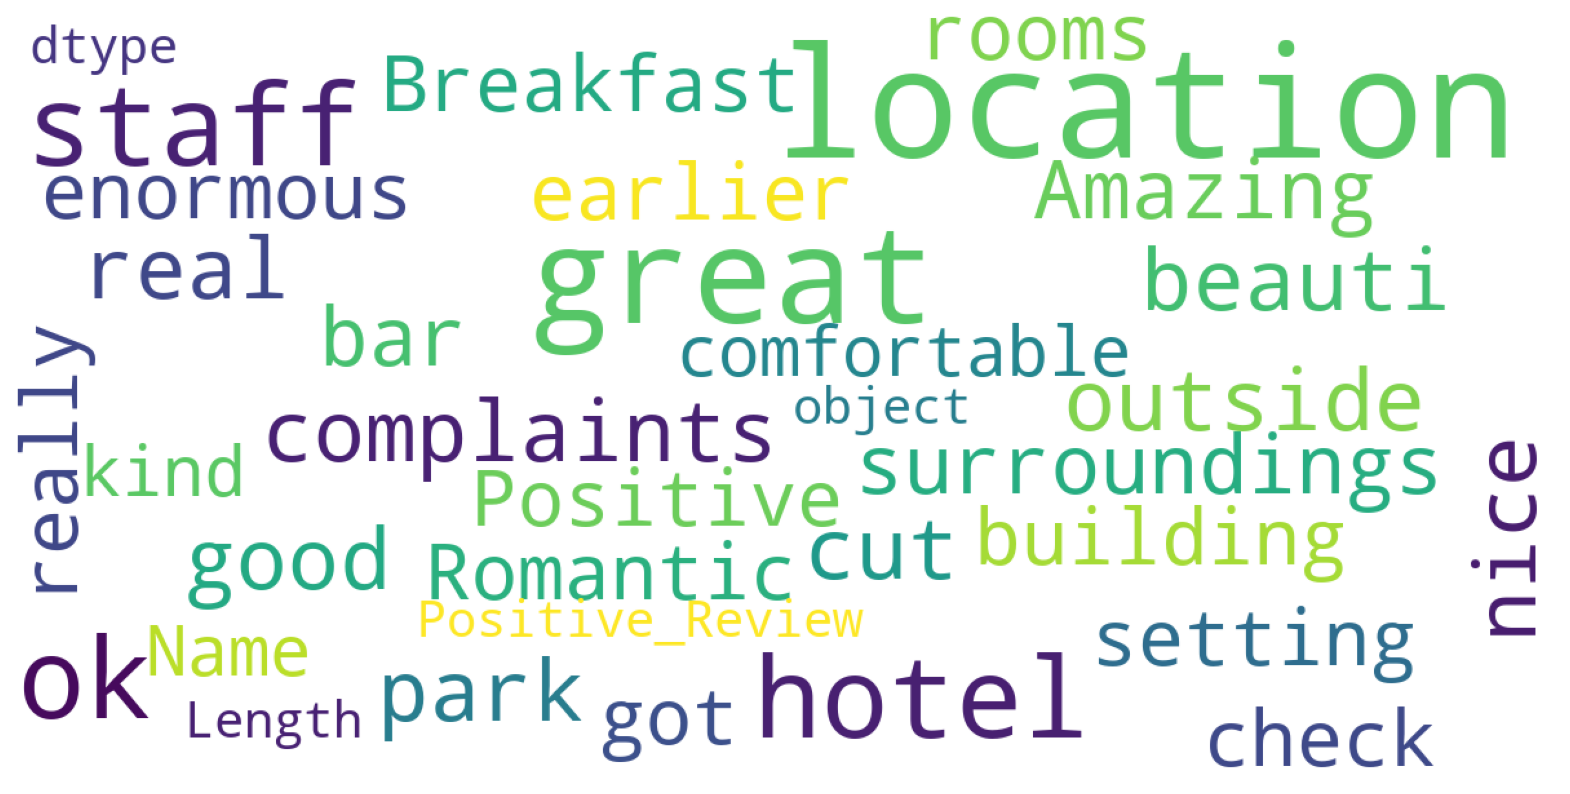

In [85]:
# Making a wordcloud of positive reviews 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(hotel_reviews['Positive_Review'])

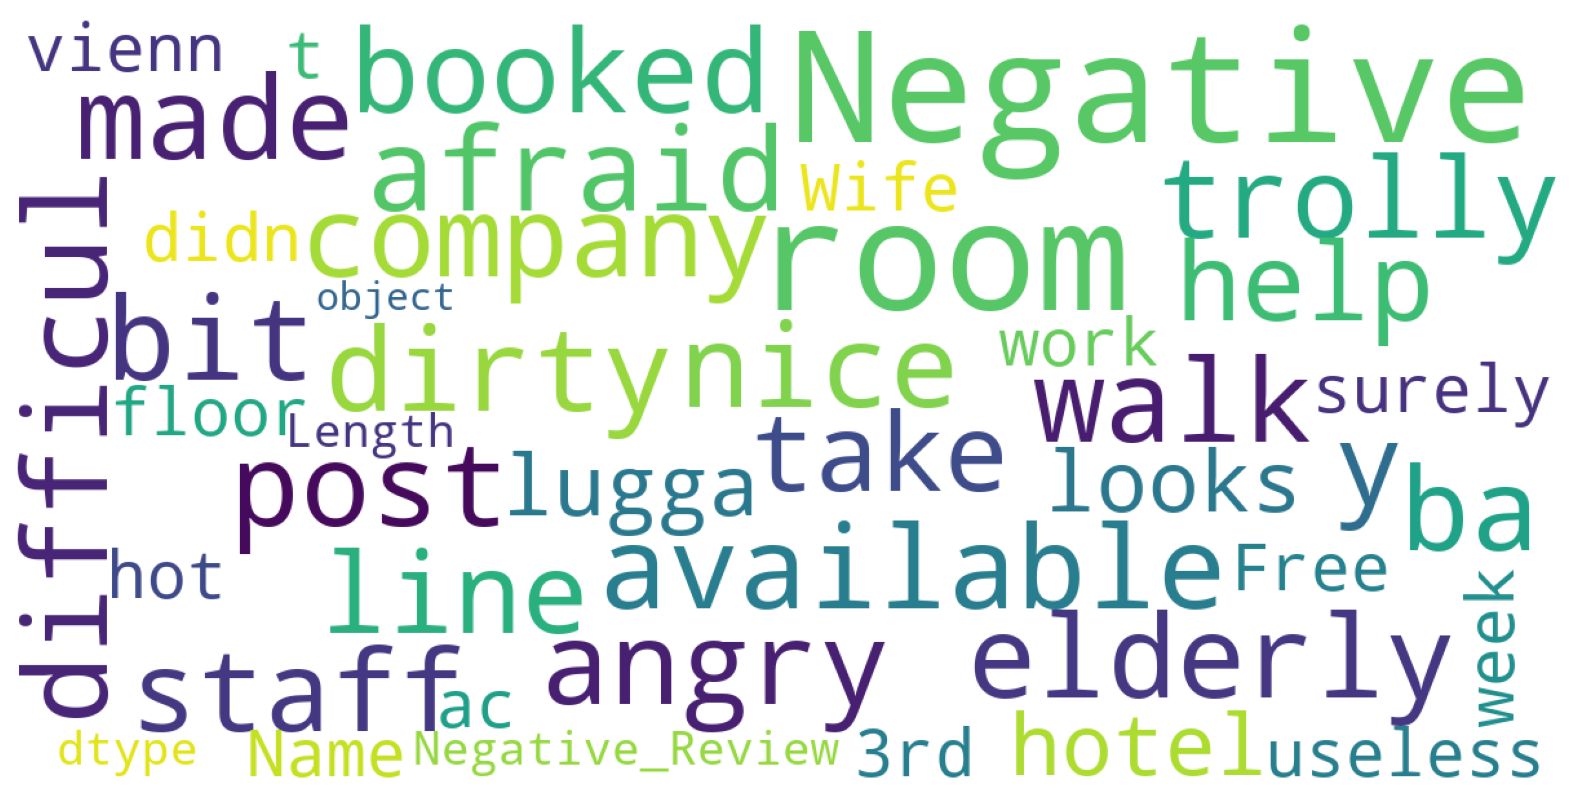

In [86]:
# Making a wordcloud of negative reviews 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(hotel_reviews['Negative_Review'])

### Taking a subset of the dataframe that has more than 100 negative words into consideration because a lot of the data contains 0's in this column when the reviewers had nothing negative to say

In [221]:
word_thresh = hotel_reviews[hotel_reviews['Review_Total_Negative_Word_Counts'] < 100].index
high_neg_word_df = hotel_reviews.drop(word_thresh)
high_neg_word_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Netherlands,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
3,Netherlands,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,Netherlands,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
22,Netherlands,194,6/10/2017,7.7,Hotel Arena,Germany,Sadly I cannot say that the rooms are clean e...,364,1403,The location is good You need 15min to 20min ...,37,21,5.4,"[' Leisure trip ', ' Family with young childre...",54 days,52.360576,4.915968
39,Netherlands,194,4/19/2017,7.7,Hotel Arena,Canada,Staff a few were friendly and willing enough ...,122,1403,Location on the park with easy access to tram...,15,1,6.3,"[' Leisure trip ', ' Couple ', ' Duplex Twin R...",106 day,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515510,Austria,168,8/12/2016,8.1,Atlantis Hotel Vienna,Israel,I ordered two double rooms standard B B When ...,166,2823,breachfast very good,4,11,7.9,"[' Leisure trip ', ' Family with older childre...",356 day,48.203745,16.335677
515525,Austria,168,6/23/2016,8.1,Atlantis Hotel Vienna,Greece,a There was no restaurant inside the hotel So...,107,2823,a The hotel was comfortable but it is more a ...,23,15,7.1,"[' Leisure trip ', ' Family with older childre...",406 day,48.203745,16.335677
515528,Austria,168,6/18/2016,8.1,Atlantis Hotel Vienna,India,We were kept down the road in another buildin...,121,2823,Just the location,4,9,3.8,"[' Leisure trip ', ' Couple ', ' Standard Doub...",411 day,48.203745,16.335677
515529,Austria,168,6/16/2016,8.1,Atlantis Hotel Vienna,Canada,When we checked in we found out that the air ...,102,2823,No Positive,0,3,3.3,"[' Leisure trip ', ' Family with older childre...",413 day,48.203745,16.335677


### Checking to see whether the average score drops if the number of negative word count increases

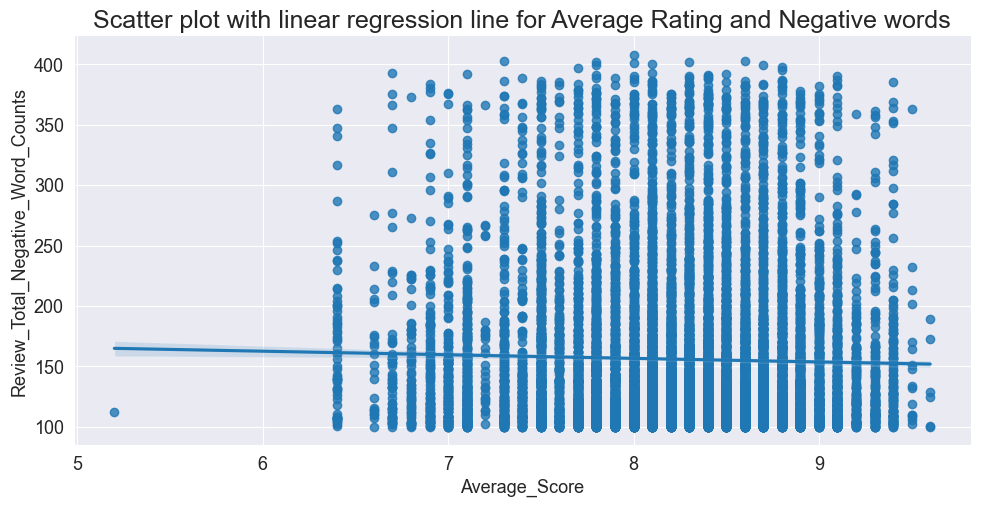

In [222]:
sns.lmplot(x = 'Average_Score', y = 'Review_Total_Negative_Word_Counts', data = high_neg_word_df, aspect=2)
plt.title('Scatter plot with linear regression line for Average Rating and Negative words')
plt.show()

### From this we can draw no conclusion about the average score solely from the number of negative words a review has. Hence we need to perform sentimental analysis in order to build a stronger relationship among the target and feature variables

Text(0.5, 1.0, 'The histogram of average score')

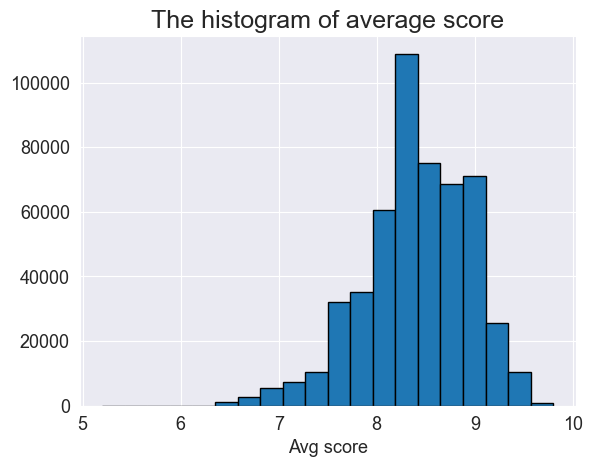

In [156]:
import matplotlib.pyplot as plt
plt.hist(hotel_reviews['Average_Score'], bins=20, edgecolor='black')
plt.xlabel("Avg score")
plt.title("The histogram of average score")

### From this graph we can conclude that most of the reviews in our dataset are positive since they are skewed between 8-9 on a scale of 10

In [223]:
# Taking only numeric columns to fit regression models

numeric_columns = ['Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score']
numeric_data = hotel_reviews[numeric_columns]
numeric_data

,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score
0,7.7,397,1403,11,7,2.9
1,7.7,0,1403,105,7,7.5
2,7.7,42,1403,21,9,7.1
3,7.7,210,1403,26,1,3.8
4,7.7,140,1403,8,3,6.7
...,...,...,...,...,...,...
515733,8.1,14,2823,2,8,7.0
515734,8.1,11,2823,11,12,5.8
515735,8.1,19,2823,0,3,2.5
515736,8.1,0,2823,25,3,8.8


In [224]:
# Building Correlation Matrix
corr = numeric_data.corr()
corr

,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score
Average_Score,1.000000,-0.112323,-0.179568,0.106719,0.036454,0.364351
Review_Total_Negative_Word_Counts,-0.112323,1.000000,0.035124,0.119613,0.003199,-0.382474
Total_Number_of_Reviews,-0.179568,0.035124,1.000000,-0.030132,-0.024910,-0.072865
Review_Total_Positive_Word_Counts,0.106719,0.119613,-0.030132,1.000000,0.026535,0.220800
Total_Number_of_Reviews_Reviewer_Has_Given,0.036454,0.003199,-0.024910,0.026535,1.000000,0.002873
Reviewer_Score,0.364351,-0.382474,-0.072865,0.220800,0.002873,1.000000


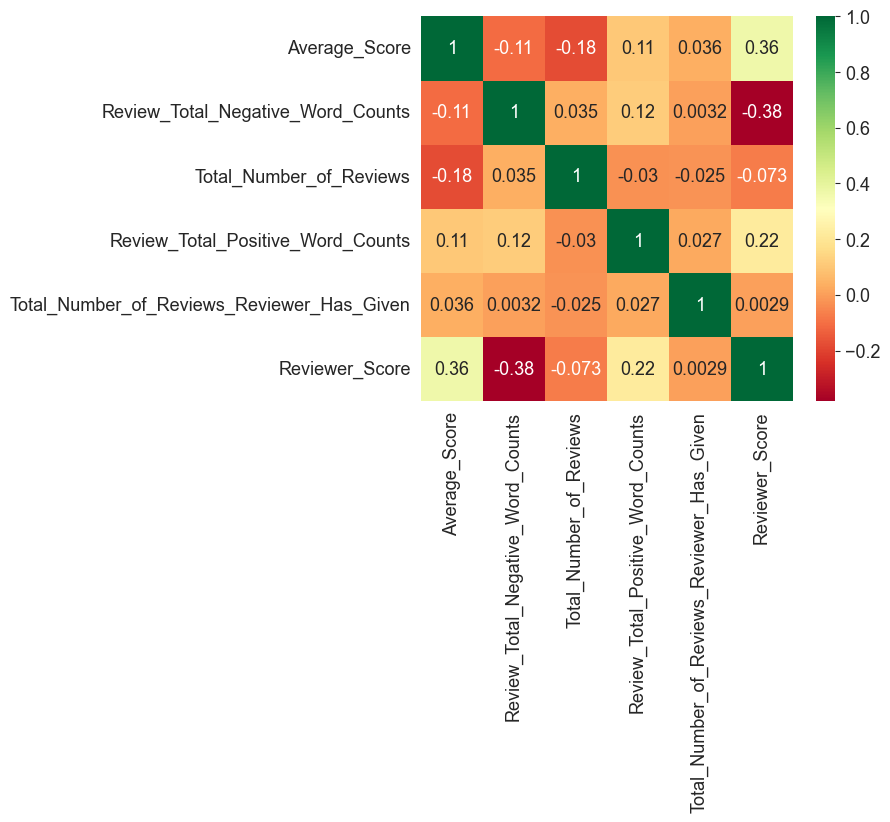

In [225]:
# Visualising the correlation matrix to see their relationship 

plt.subplots(figsize=(6,5))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

### From the correlation matrix we can see that the variables are not highly correlated with each other and we need to use other methods in order to draw solid conclusions about this dataset

In [226]:
# Calculating variance inflation factor between variables to check if there is multicollinarity between any variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = DataFrame(numeric_data.columns)
vif_data.columns  = ["Feature"]

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]

print(vif_data)

                                      Feature        VIF
0                               Average_Score  42.059300
1           Review_Total_Negative_Word_Counts   1.675595
2                     Total_Number_of_Reviews   2.333786
3           Review_Total_Positive_Word_Counts   1.835701
4  Total_Number_of_Reviews_Reviewer_Has_Given   1.424612
5                              Reviewer_Score  39.120019


### From the VIF we can conclude that the average score and reviewer score have high multicolinearity. This makes sense since the average score and the reviewer score is correlated to the number of positive or negative reviews and also the total number of reviews

## Fitting regression models - before sentiment analysis

In [229]:
# Splitting the data into training and testing data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Here we take our target as the average score and try 
# predicting it based on the rest of the reviewer metrics

# Separate features (X) and target variable (y)
X = numeric_data.drop('Average_Score', axis=1)
y = numeric_data.Average_Score

# Scale the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [230]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict the target variable for the test set (optional)
y_pred = lr_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the test set (optional)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Linear Regression is:", mse)

Mean Squared Error (MSE) for Linear Regression is: 0.25069069390739


In [231]:
from sklearn.preprocessing import PolynomialFeatures

# Increasing degree above 2 did not improve the MSE, hence we choose 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

y_poly_fit = poly_model.predict(X_poly_test)

MSE = mean_squared_error(y_test, y_poly_fit)
print("Mean Squared Error (MSE) for Polynomial Regression is:")
print(MSE)

Mean Squared Error (MSE) for Polynomial Regression is:
0.24702784257585908


### From the scatter plot we could tell that the data did not follow a linear relationship and hence we can see why fitting a polynomial regression model over the features gives us a better MSE

## Regularization

### Checking to see if regularization has any impact on the MSE

In [138]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Fit a Lasso regression model
alpha = 0.1  # L1 regularization strength (adjust as needed)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
# Print the results
print("Mean Squared Error (MSE)for Lasso Regression before parameter tuning:", mse)

Mean Squared Error (MSE)for Lasso Regression before parameter tuning: 0.25495063357292697


In [140]:
# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas}

grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value from the tuning
best_alpha = grid_search.best_params_['alpha']
print("Best tuned alpha value :", best_alpha)

# Fit a Lasso regression model with the best alpha value
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE) for Lasso Regression with best alpha :", mse)

Best tuned alpha value : 0.001
Mean Squared Error (MSE) for Lasso Regression with best alpha : 0.2506893400542381


In [147]:
from pandas import DataFrame
import matplotlib.pyplot as plt

# Printing and visualising the table of coeffecients 
coeff_df = DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(lasso_model.coef_)
print(coeff_df)

                                      Feature  Coefficient Estimate
0           Review_Total_Negative_Word_Counts              0.000490
1                     Total_Number_of_Reviews             -0.000036
2           Review_Total_Positive_Word_Counts              0.000473
3  Total_Number_of_Reviews_Reviewer_Has_Given              0.001571
4                              Reviewer_Score              0.120117


### Since we have a few features to begin with, we can see why Lasso doesn't perform any better than linear regression 

In [142]:
from sklearn.linear_model import Ridge

alpha = 0.1
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE) for Ridge Regression:", mse)

Mean Squared Error (MSE) for Ridge Regression: 0.25069069385888737


In [232]:
# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas}

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value from the tuning
best_alpha = grid_search.best_params_['alpha']
print("Best tuned alpha value :", best_alpha)

# Fit a Ridge regression model with the best alpha value
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE) for Ridge Regression with best alpha :", mse)

Best tuned alpha value : 100
Mean Squared Error (MSE) for Ridge Regression with best alpha : 0.250690645817518


In [233]:
coeff_df = DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(ridge_model.coef_)
print(coeff_df)

                                      Feature  Coefficient Estimate
0           Review_Total_Negative_Word_Counts              0.000501
1                     Total_Number_of_Reviews             -0.000036
2           Review_Total_Positive_Word_Counts              0.000465
3  Total_Number_of_Reviews_Reviewer_Has_Given              0.001580
4                              Reviewer_Score              0.120583


In [234]:
from sklearn.linear_model import ElasticNet

alpha = 0.1
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE) for Elastic Net Regression before parameter tuning:", mse)

# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
L1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas, 'l1_ratio': L1_ratios}

grid_search = GridSearchCV(elastic_net_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value from the tuning
best_alpha = grid_search.best_params_['alpha']
best_L1 = grid_search.best_params_['l1_ratio']
print("Best tuned alpha value :", best_alpha)
print("Best tuned L1 ratio value :", best_L1)

# Fit a Ridge regression model with the best alpha value
elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_L1)
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE) for Elastic Net Regression with best alpha and l1 ratio :", mse)

Mean Squared Error (MSE) for Elastic Net Regression before parameter tuning: 0.2519190911669129
Best tuned alpha value : 0.001
Best tuned L1 ratio value : 0.1
Mean Squared Error (MSE) for Elastic Net Regression with best alpha and l1 ratio : 0.25069035025546926


### Even using Ridge and Elastic Net doesn't give us any improvements on MSE. We can conclude that regularization methods may not be the best approach for this dataset since we don't have a large number of variables, high colinearity or variable grouping in this dataset.

## Conclusions

### As it stands, the Polynomial Regression model is the best model for predicting the average score based on the features
### However, no concrete evidence can be drawn on how a customer should anticipate their visit without performing sentiment analysis using some form of NLP. 